# Introduction

Hello. I am Svyatoslav Rogozin, the creator of this repository. The repository visualizes raw data from two forest stations in Estonia: Agali II and Soontaga. This HTML page is created using python version of Jupyter Notebook; however, the raw data visualization is conducted through R calculations and interactive plots based on the RFlux R-package. Enjoy it.

# Agali II raw data (Non-interactive)

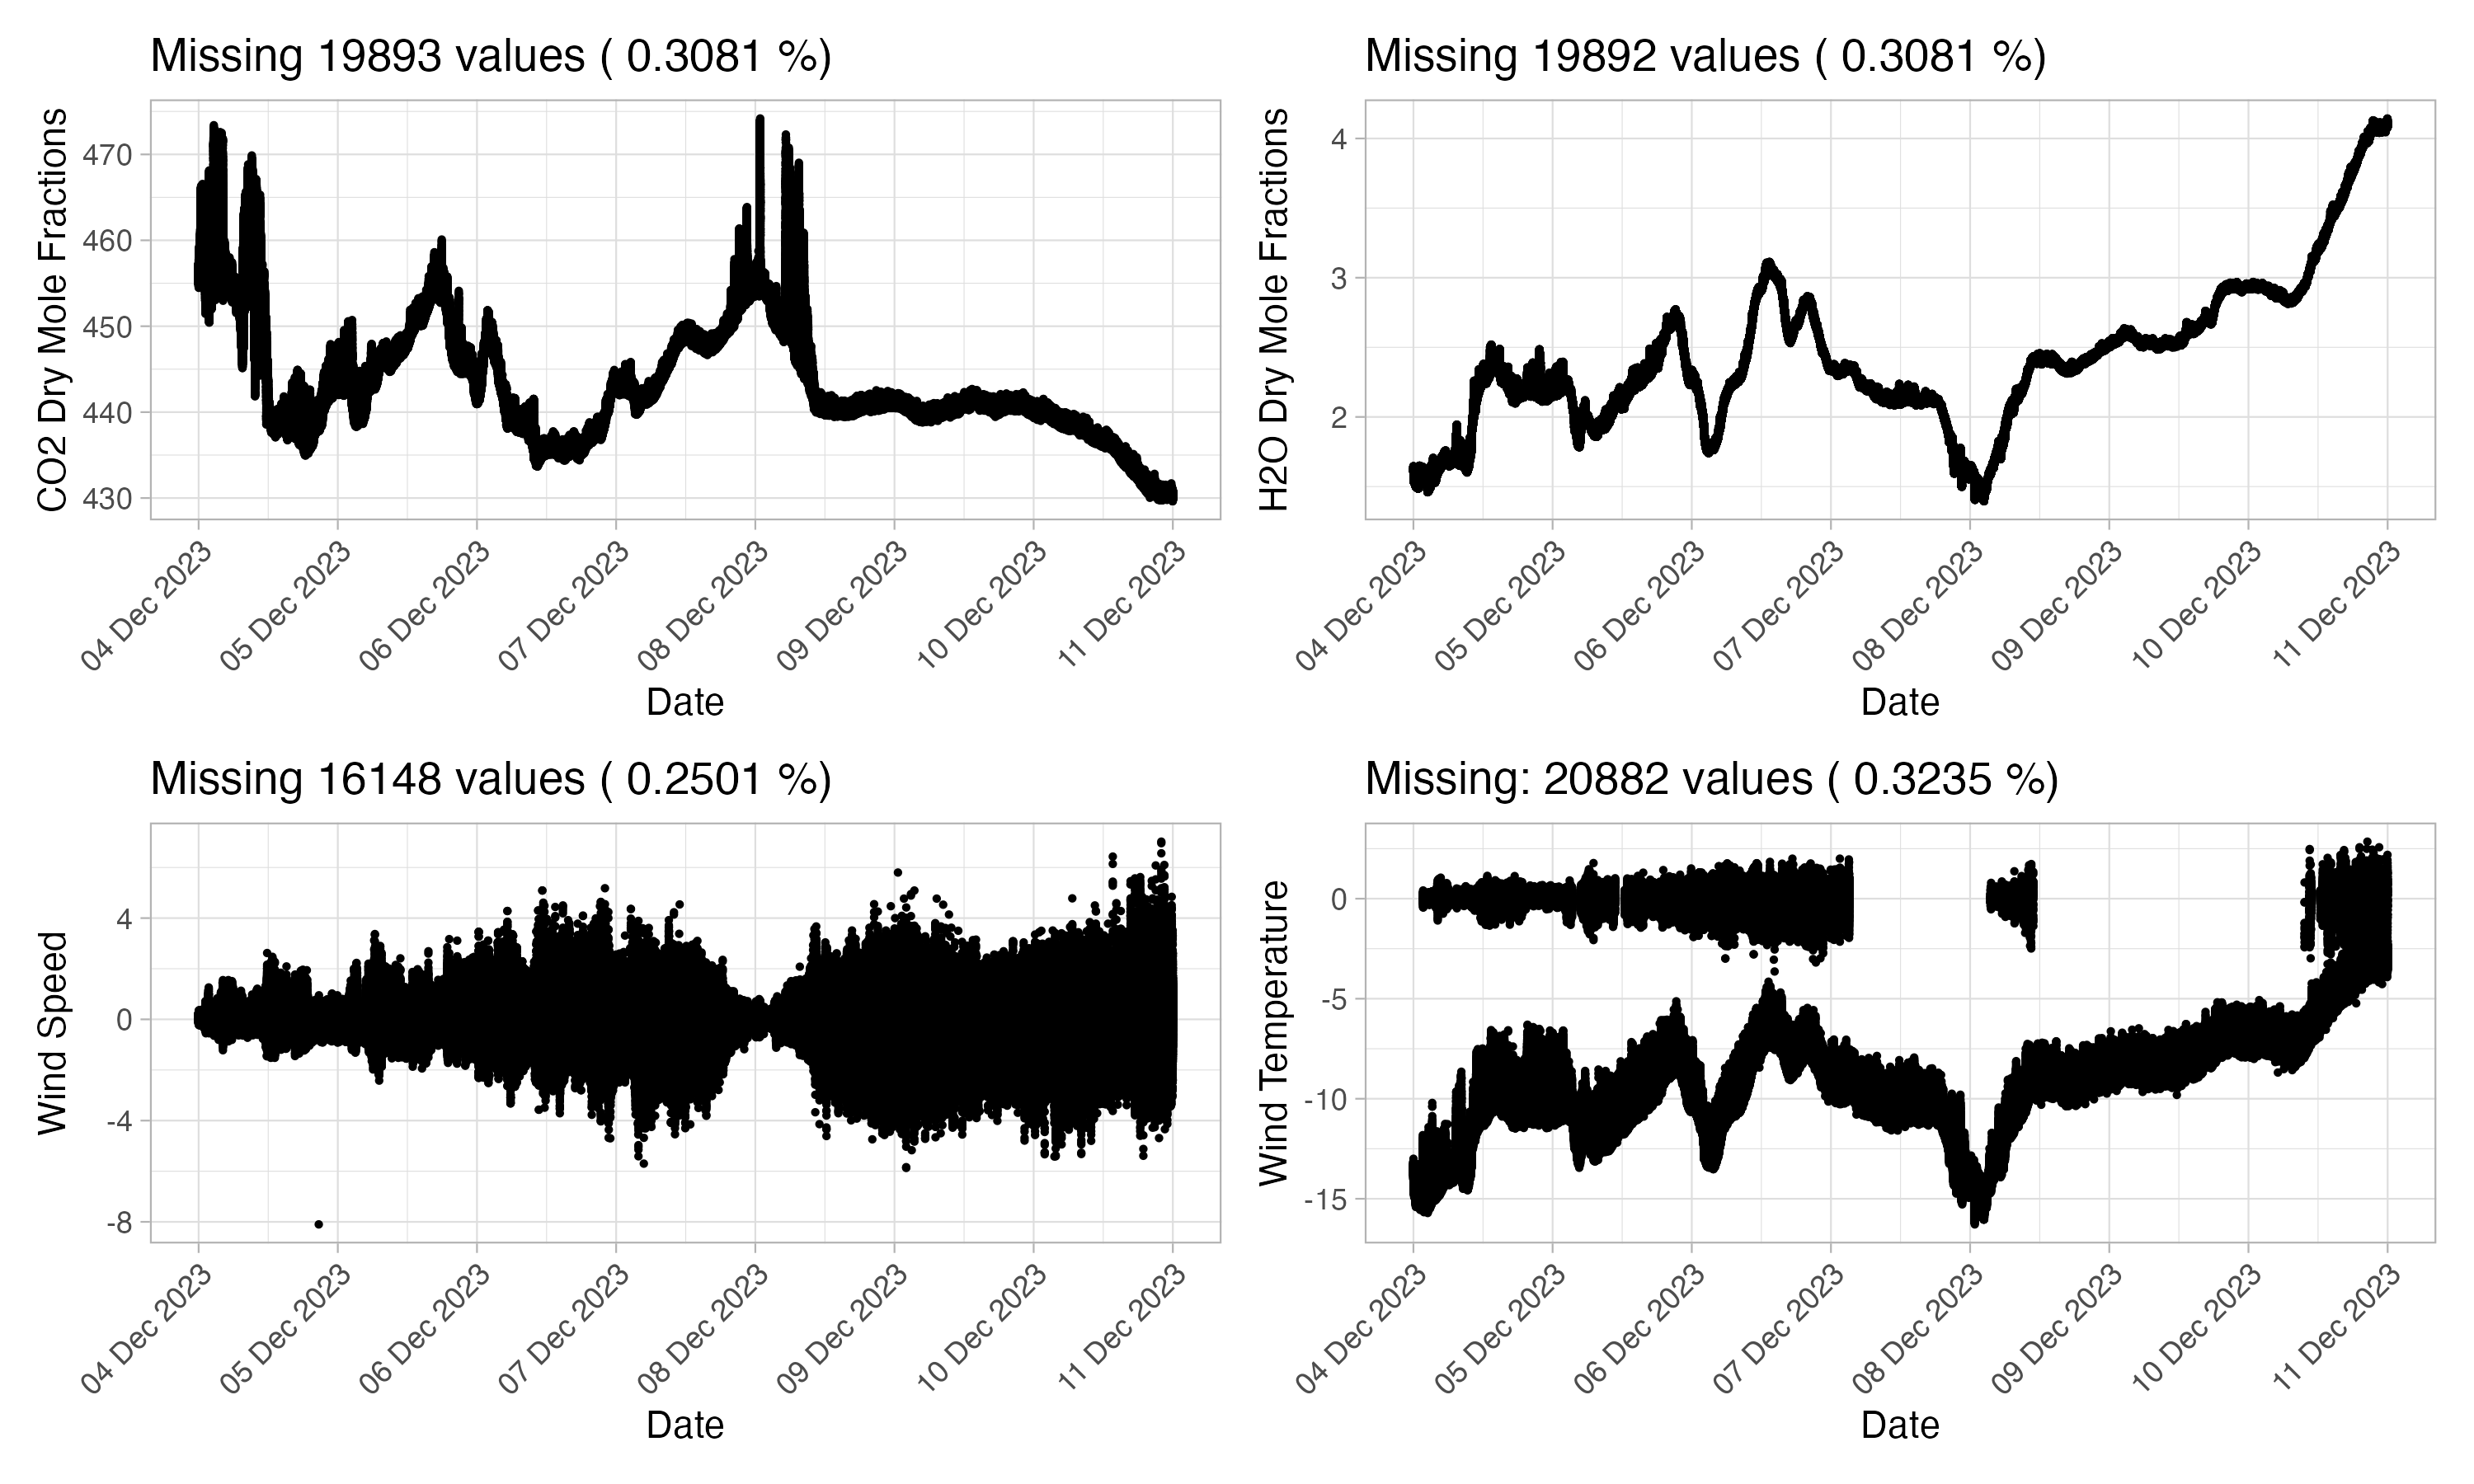

In [43]:
import os
from IPython.display import display, Image

def display_newest_image(folder_path):
    # Получаем список файлов в указанной папке
    files = os.listdir(folder_path)
    
    # Отфильтровываем только изображения (может потребоваться расширить список форматов)
    image_files = [f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]
    
    if not image_files:
        print("В папке нет изображений.")
        return
    
    # Находим самый новый файл
    newest_image = max(image_files, key=lambda x: os.path.getctime(os.path.join(folder_path, x)))
    
    # Получаем полный путь к самому новому изображению
    image_path = os.path.join(folder_path, newest_image)
    
    # Отображаем изображение в ячейке
    img = Image(filename=image_path)
    display(img)

folder_path = "/Users/svyatoslav/Desktop/Main_code/Agalill_Combined_Graphs"
display_newest_image(folder_path);


# Agali II EddyPro express mode data (Interactive)

The visualization is fully zoomable, with a time period set at every half hour.

In [52]:
import os
import pandas as pd

folder_path = "/Users/svyatoslav/Jupyter/Raw_Data_Vizualization"
file_name = "Agali_II"

files = [f for f in os.listdir(folder_path) if file_name in f and f.endswith('.csv')]
files = [os.path.join(folder_path, f) for f in files]

if files:
    file_timestamps = [os.path.getmtime(f) for f in files]
    newest_index = file_timestamps.index(max(file_timestamps))
    newest_file = files[newest_index]
df = pd.read_csv(newest_file)
df.reset_index(drop=True, inplace=True)
df = df.drop(0)

In [53]:
import pandas as pd
import plotly.graph_objects as go

df['date'] = df['date'].str.replace('-', ':')
df['date_time'] = df['date'] + ':' + df['time']
df['date_time'] = pd.to_datetime(df['date_time'], format='%Y:%m:%d:%H:%M:%S')
df = df.rename(columns={'date_time': 'TIMESTAMP'})

df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])  # Ensure TIMESTAMP column is in datetime format

# Convert columns to numeric
df['co2_mixing_ratio'] = pd.to_numeric(df['co2_mixing_ratio'], errors='coerce')
df['h2o_mixing_ratio'] = pd.to_numeric(df['h2o_mixing_ratio'], errors='coerce')
df['H'] = pd.to_numeric(df['H'], errors='coerce')
df['LE'] = pd.to_numeric(df['LE'], errors='coerce')
df['ET'] = pd.to_numeric(df['ET'], errors='coerce')
df['wind_speed'] = pd.to_numeric(df['wind_speed'], errors='coerce')
df['u*'] = pd.to_numeric(df['u*'], errors='coerce')
df['co2_flux'] = pd.to_numeric(df['co2_flux'], errors='coerce')
df['co2_strg'] = pd.to_numeric(df['co2_strg'], errors='coerce')

# Create a list of variable names with custom labels
variable_names = {
    'co2_mixing_ratio': 'CO₂ (ppm)',
    'h2o_mixing_ratio': 'H₂O (mmol/mol)',
    'H': 'Sensible heat flux',
    'LE': 'Latent heat flux',
    'ET': 'Evapotranspiration',
    'wind_speed': 'Wind speed',
    'u*': 'Friction velocity',
    'co2_flux': 'Unfiltered CO₂ flux',
    'co2_strg': 'Tower-top CO₂ flux storage'
}

# Filter the dataframe to include only the last 7 days of measurements
last_date = df['TIMESTAMP'].max()
start_date = last_date - pd.DateOffset(days=7)
filtered_df = df[df['TIMESTAMP'] >= start_date]

# Create an initial figure with only CO2 Mixing Ratio
initial_variable = 'co2_mixing_ratio'
fig = go.Figure(go.Scatter(x=filtered_df['TIMESTAMP'], y=filtered_df[initial_variable], mode='lines', name=variable_names[initial_variable]))

# Add dropdown menu with custom labels
buttons = [dict(label=label, method="update", args=[{"y": [filtered_df[variable]]}]) for variable, label in variable_names.items()]

# Add an annotation to simulate the dropdown label in the title
fig.update_layout(
    updatemenus=[dict(type="dropdown", active=0, buttons=buttons, showactive=True, x=-0.045, xanchor='left', y=1.11, yanchor='top')],
    title_text="Agali II variables over the last 7 days",
    xaxis_title="Time",
    yaxis_title="Value",
    paper_bgcolor='white',
    plot_bgcolor='white',
    xaxis=dict(showgrid=True, gridcolor='lightgrey'),
    yaxis=dict(showgrid=True, gridcolor='lightgrey') 
)

# Show the interactive plot
fig.show()


In [7]:
import os
import shutil

folder_path = "/Users/svyatoslav/Jupyter/Raw_Data_Vizualization/Agali_eddy_pro_dataset"
file_name = "full_output"

# Function to delete files and folders
def delete_item(item_path):
    try:
        if os.path.isfile(item_path):
            os.remove(item_path)
        elif os.path.isdir(item_path):
            shutil.rmtree(item_path)
    except Exception as e:
        print(f"Error deleting {item_path}: {e}")

# List all files and folders in the directory
items = os.listdir(folder_path)

# Iterate through the items and remove them, except the one containing "full_output"
for item in items:
    item_path = os.path.join(folder_path, item)
    if file_name in item and item.endswith('.csv'):
        continue  # Skip the file we want to keep
    delete_item(item_path)

# Soontaga raw data (Non-interactive)

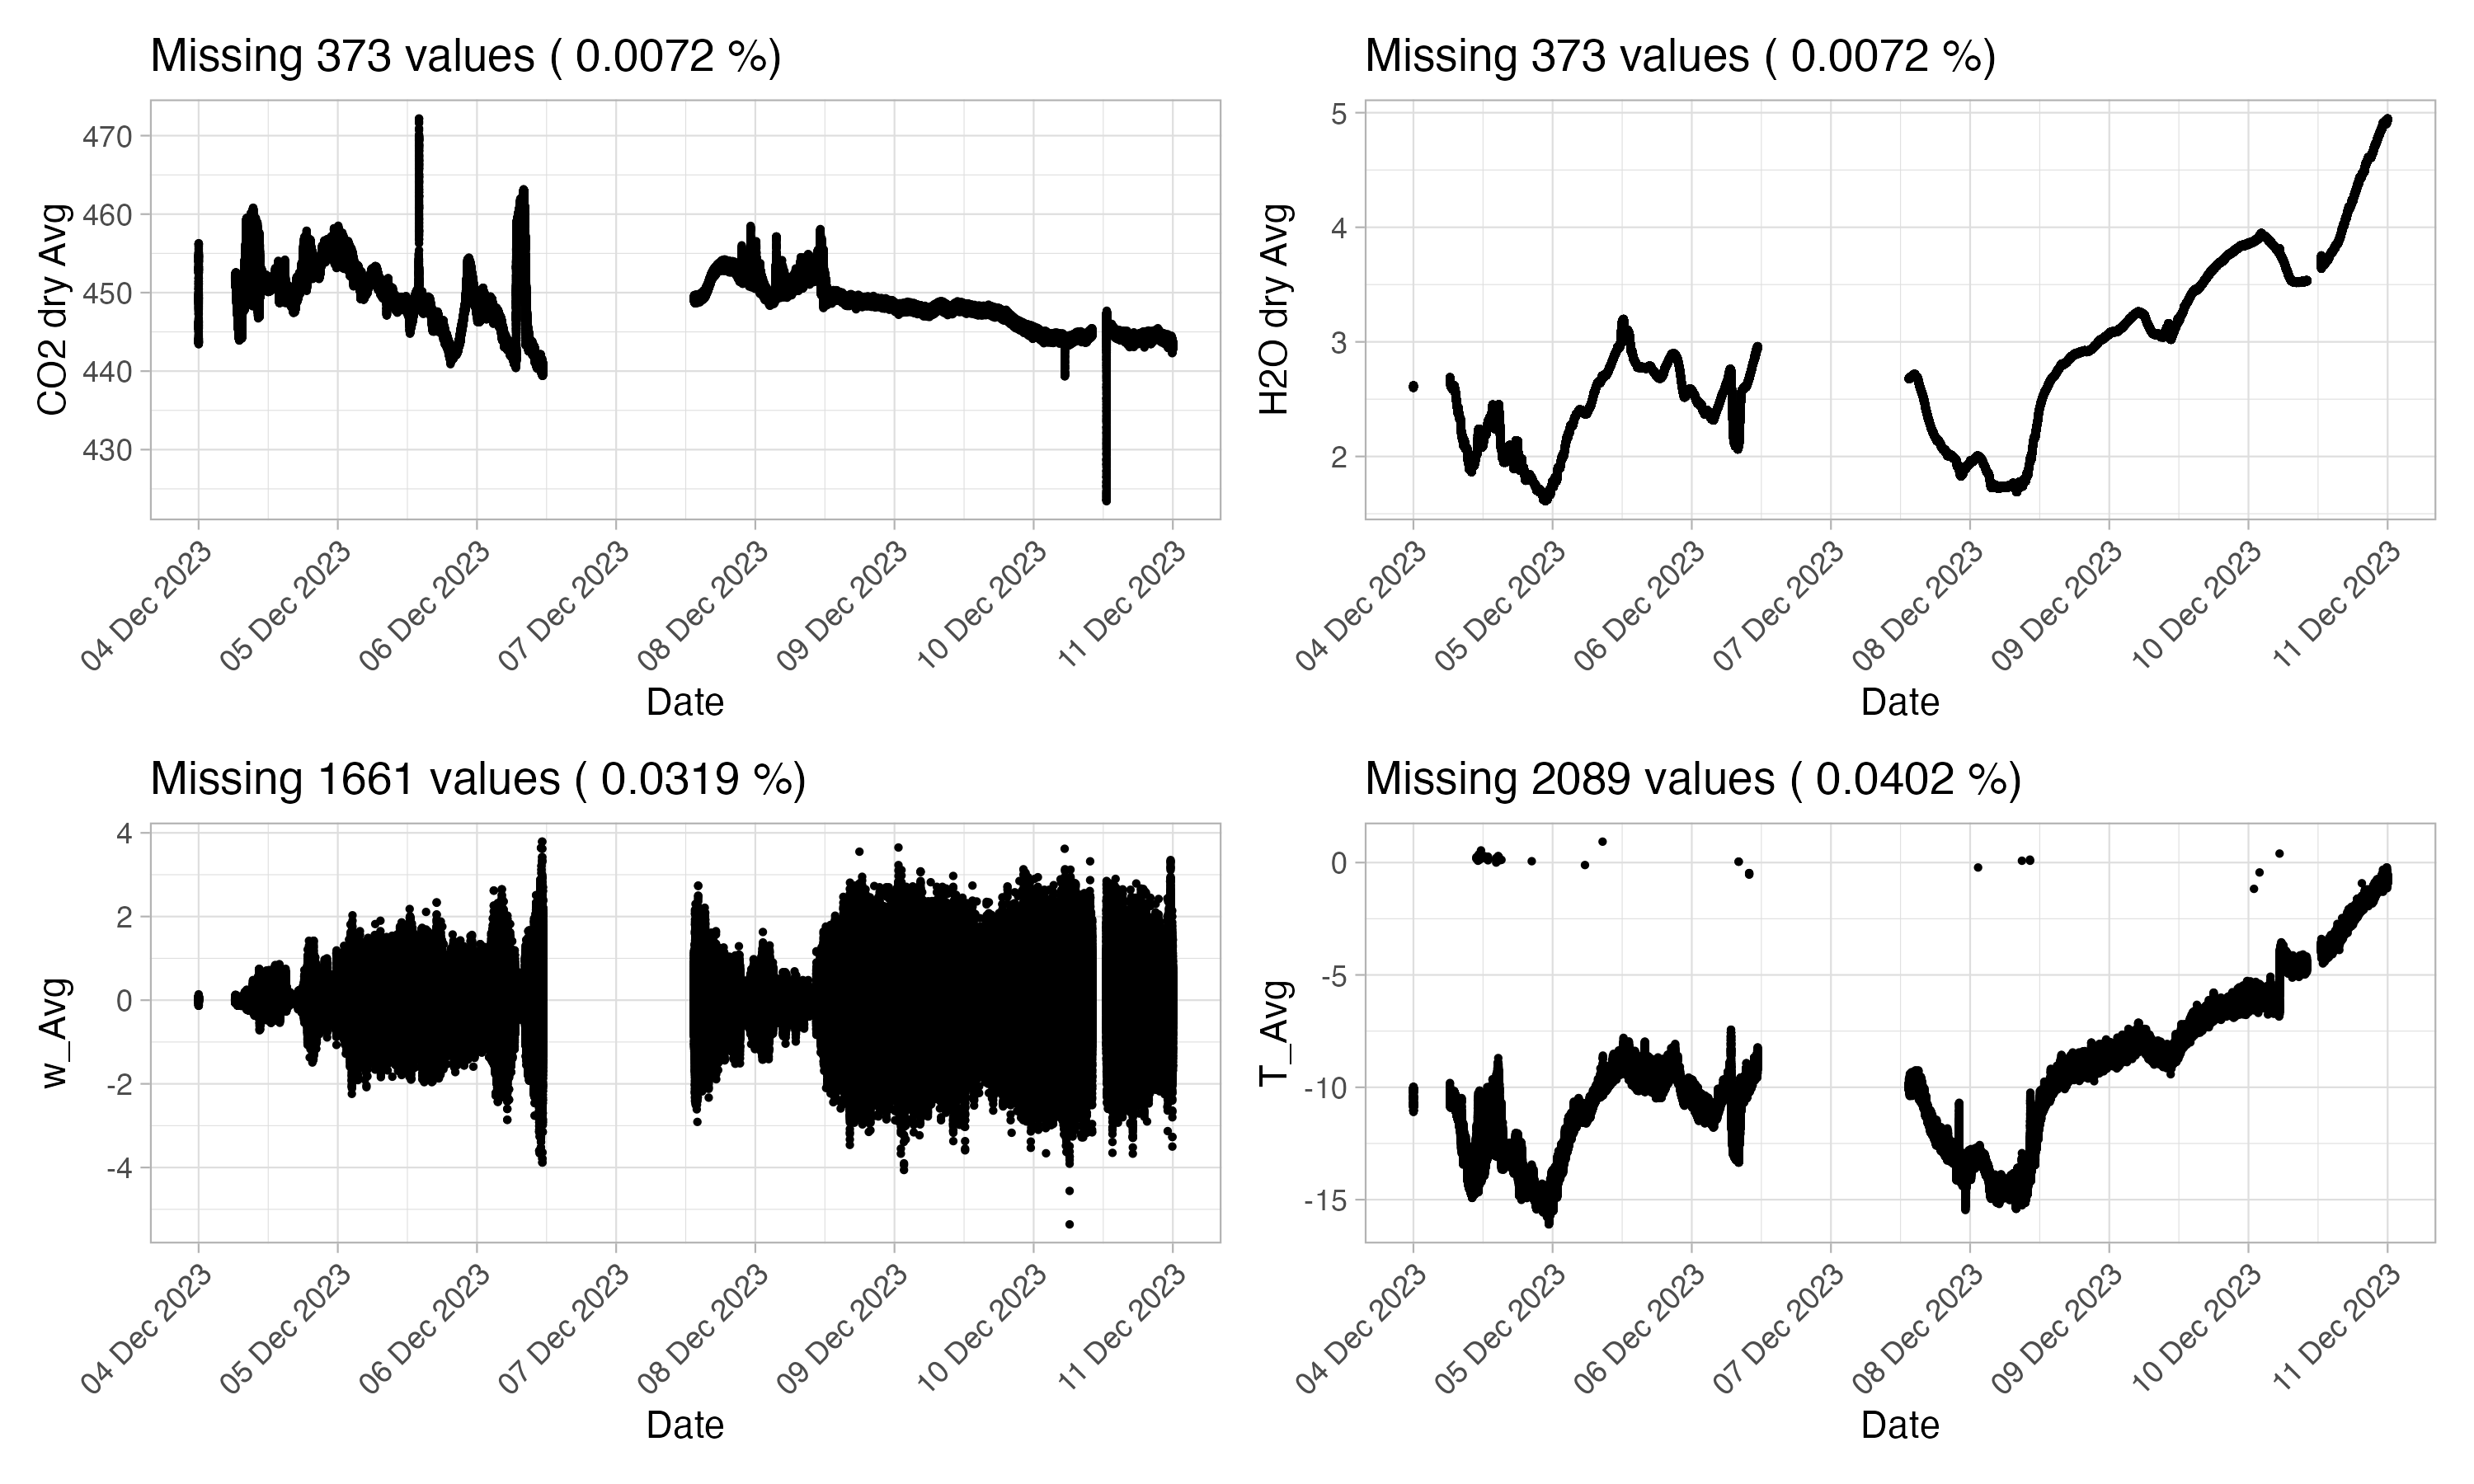

In [5]:
import os
from IPython.display import display, Image

def display_newest_image(folder_path):
    # Получаем список файлов в указанной папке
    files = os.listdir(folder_path)
    
    # Отфильтровываем только изображения (может потребоваться расширить список форматов)
    image_files = [f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]
    
    if not image_files:
        print("В папке нет изображений.")
        return
    
    # Находим самый новый файл
    newest_image = max(image_files, key=lambda x: os.path.getctime(os.path.join(folder_path, x)))
    
    # Получаем полный путь к самому новому изображению
    image_path = os.path.join(folder_path, newest_image)
    
    # Отображаем изображение в ячейке
    img = Image(filename=image_path)
    display(img)

# Замените "/Users/svyatoslav/Desktop/Main_code/Agalill_Combined_Graphs" на свой путь к папке
folder_path = "/Users/svyatoslav/Desktop/Main_code/Soontaga_Combined_Graphs"
display_newest_image(folder_path)

# Soontaga EddyPro express mode data (Interactive)

The visualization is fully zoomable, with a time period set at every half hour.

In [55]:
import os
import pandas as pd

folder_path = "/Users/svyatoslav/Jupyter/Raw_Data_Vizualization"
file_name = "Soontaga"

files = [f for f in os.listdir(folder_path) if file_name in f and f.endswith('.csv')]
files = [os.path.join(folder_path, f) for f in files]

if files:
    file_timestamps = [os.path.getmtime(f) for f in files]
    newest_index = file_timestamps.index(max(file_timestamps))
    newest_file = files[newest_index]
df = pd.read_csv(newest_file)
df.reset_index(drop=True, inplace=True)
df = df.drop(0)

In [56]:
import pandas as pd
import plotly.graph_objects as go

df['date'] = df['date'].str.replace('-', ':')
df['date_time'] = df['date'] + ':' + df['time']
df['date_time'] = pd.to_datetime(df['date_time'], format='%Y:%m:%d:%H:%M:%S')
df = df.rename(columns={'date_time': 'TIMESTAMP'})

df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])  # Ensure TIMESTAMP column is in datetime format

# Convert columns to numeric
df['co2_mixing_ratio'] = pd.to_numeric(df['co2_mixing_ratio'], errors='coerce')
df['h2o_mixing_ratio'] = pd.to_numeric(df['h2o_mixing_ratio'], errors='coerce')
df['H'] = pd.to_numeric(df['H'], errors='coerce')
df['LE'] = pd.to_numeric(df['LE'], errors='coerce')
df['ET'] = pd.to_numeric(df['ET'], errors='coerce')
df['wind_speed'] = pd.to_numeric(df['wind_speed'], errors='coerce')
df['u*'] = pd.to_numeric(df['u*'], errors='coerce')
df['co2_flux'] = pd.to_numeric(df['co2_flux'], errors='coerce')
df['co2_strg'] = pd.to_numeric(df['co2_strg'], errors='coerce')

# Create a list of variable names with custom labels
variable_names = {
    'co2_mixing_ratio': 'CO₂ (ppm)',
    'h2o_mixing_ratio': 'H₂O (mmol/mol)',
    'H': 'Sensible heat flux',
    'LE': 'Latent heat flux',
    'ET': 'Evapotranspiration',
    'wind_speed': 'Wind speed',
    'u*': 'Friction velocity',
    'co2_flux': 'Unfiltered CO₂ flux',
    'co2_strg': 'Tower-top CO₂ flux storage'
}


# Filter the dataframe to include only the last 7 days of measurements
last_date = df['TIMESTAMP'].max()
start_date = last_date - pd.DateOffset(days=7)
filtered_df = df[df['TIMESTAMP'] >= start_date]

# Create an initial figure with only CO2 Mixing Ratio
initial_variable = 'co2_mixing_ratio'
fig = go.Figure(go.Scatter(x=filtered_df['TIMESTAMP'], y=filtered_df[initial_variable], mode='lines', name=variable_names[initial_variable]))

# Add dropdown menu with custom labels
buttons = [dict(label=label, method="update", args=[{"y": [filtered_df[variable]]}]) for variable, label in variable_names.items()]

# Add an annotation to simulate the dropdown label in the title
fig.update_layout(
    updatemenus=[dict(type="dropdown", active=0, buttons=buttons, showactive=True, x=-0.045, xanchor='left', y=1.11, yanchor='top')],
    title_text="Soontaga variables over the last 7 days",
    xaxis_title="Time",
    yaxis_title="Value",
    paper_bgcolor='white',
    plot_bgcolor='white',
    xaxis=dict(showgrid=True, gridcolor='lightgrey'),
    yaxis=dict(showgrid=True, gridcolor='lightgrey') 
)

# Show the interactive plot
fig.show()

In [42]:
import os
import shutil

folder_path = "/Users/svyatoslav/Jupyter/Raw_Data_Vizualization/Soontaga_eddy_pro_dataset"
file_name = "full_output"

# Function to delete files and folders
def delete_item(item_path):
    try:
        if os.path.isfile(item_path):
            os.remove(item_path)
        elif os.path.isdir(item_path):
            shutil.rmtree(item_path)
    except Exception as e:
        print(f"Error deleting {item_path}: {e}")

# List all files and folders in the directory
items = os.listdir(folder_path)

# Iterate through the items and remove them, except the one containing "full_output"
for item in items:
    item_path = os.path.join(folder_path, item)
    if file_name in item and item.endswith('.csv'):
        continue  # Skip the file we want to keep
    delete_item(item_path)


In [12]:
from nbconvert import HTMLExporter
import nbformat
from plotly.offline import init_notebook_mode, iplot

# Initialize Plotly for offline use
init_notebook_mode(connected=True)

# Load Jupyter Notebook
notebook_path = '/Users/svyatoslav/Jupyter/Raw_Data_Vizualization/index.ipynb'
with open(notebook_path, 'r', encoding='utf-8') as nb_file:
    notebook_content = nb_file.read()

# Create HTML exporter
html_exporter = HTMLExporter()

# Disable code cell input in the exported HTML
html_exporter.exclude_input = True

# Convert to HTML
(body, resources) = html_exporter.from_notebook_node(nbformat.reads(notebook_content, as_version=4))

# Ensure that Plotly interactive elements are included
script = """
    <script type="text/javascript">
        require.config({
            paths: {
                plotly: 'https://cdn.plot.ly/plotly-latest.min'
            },
        });
    </script>
"""
body = body.replace('</head>', f'{script}</head>')

# Save HTML file to the desktop
output_path = '/Users/svyatoslav/Documents/GitHub/Stations/docs/index.html'
with open(output_path, 'w', encoding='utf-8') as output_file:
    output_file.write(body)
